# Titanic Survival Analysis

In the early hours of the morning of 15 April 1912, the RMS Titanic sank on its maiden voyage across the Atlantic Ocean 
after it struck an iceberg. As part of an independent investigation into the tragedy, you are tasked with analysing the
survival logs for passengers aboard the Titanic.

The purpose of this notebook it to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The components of this analysis will include:
1. Exploritory Data Analysis
2. Data Cleaning
3. Data Modeling
4. Data Prediction

## Dataset Description

We have a training and test csv.

For the training set, we have the ground truth of whether each passenger survivors. 
The test set should be used to see how well your model performs on unseen data.


| Variable | Definition | Description |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class (proxy for socio-economic status) | 1 = Upper, 2 = Middle, 3 = Lower |
| sex | Sex of Passemger | male/female |
| Age | Age in years | Integer (Example: 25) |
| sibsp | # of siblings / spouses aboard the Titanic | Integer (Example: 2) |
| parch | # of parents / children aboard the Titanic | Integer (Example: 1) |
| ticket | Ticket number | Str (Example: "SC/Paris 2123") |
| fare | Passenger fare | Float (Example: 41.5792)|
| cabin | Cabin number | Str (Example: "B78")|
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

### Additional Notes

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way..\n
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# Imports
import os
import pylab
import pydotplus

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import glm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from six import StringIO
from IPython.display import Image  

from scipy.optimize import minimize 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

### Load in the data

In [2]:
# Survived

data_dir = "data"
train_path = os.path.join(data_dir, "augmented_train.csv")
train_df = pd.read_csv(train_path)
print(f"Train df: {train_df.shape}\n")
train_df.head()

Train df: (891, 11)



,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [3]:
### Create a Validation Set

sub_train_df, sub_validation_df = train_test_split(train_df, test_size=0.2)
print(f"sub_train_df      {sub_train_df.shape}")
print(f"sub_validation_df {sub_validation_df.shape}")

sub_train_df      (712, 11)
sub_validation_df (179, 11)


In [4]:
print(f"Perentage of data null (out of {train_df.shape[0]} rows):")
train_df.isnull().sum() / train_df.shape[0] * 100

Perentage of data null (out of 891 rows):


PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
Age            0.0
dtype: float64

## 3. Data Modeling


What is a GLM?
A generalized linear model (GLM) is a flexible generalization of ordinary linear regression.

### Task
Build an appropriate logistic regression model of the the data, identifying any variables signicant for the purpose of predicting survival of passengers aboard the Titanic

### Follow Up Question
Using the model to determine if socio-economic status had any bearing on the likelihood of survival for male passengers?

In [5]:
# Binomial Family links: [logit, probit, cauchy, log, loglog, and cloglog]
model_A = glm('Survived ~ Sex + Age + Pclass', family=sm.families.Binomial(), data=train_df)
model_res_A = model_A.fit()
model_res_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -402.44
Date:                Tue, 25 Oct 2022   Deviance:                       804.88
Time:                        10:59:18   Pearson chi2:                     937.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3485
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.8510      0.468     10.357      0.000       3.933       5.769
Sex[T.male]    -2.5695      0.186    -13.783      0.000      -2.935      -2.204
Age            -0.0343      0.007     -4.596      0.000      -0.049      -0.020
Pclass         -1.2283      0.125     -9.804      0.000      -1.474      -0.983
===============================================================================
"""

In [6]:
# Binomial Family links: [logit, probit, cauchy, log, loglog, and cloglog]
model_B = glm('Survived ~ Sex + Age + Pclass + Sex*Pclass', family=sm.families.Binomial(), data=train_df)
model_res_B = model_B.fit()
model_res_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -390.10
Date:                Tue, 25 Oct 2022   Deviance:                       780.20
Time:                        10:59:18   Pearson chi2:                 1.12e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3663
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.7561      0.935      8.295      0.000       5.923       9.589
Sex[T.male]           -6.0836      0.892     -6.823      0.000      -7.831      -4.336
Age                   -0.0360      0.008     -4.641      0.000      -0.051      -0.021
Pclass                -2.3133      0.311     -7.448      0.000      -2.922      -1.705
Sex[T.male]:Pclass     1.4030      0.327      4.297      0.000       0.763       2.043
======================================================================================
"""

# What is deviation?
Deviance is a goodness-of-fit metric for statistical models, particularly used for GLMs.

It is defined as the difference between the Saturated and Proposed Models and can be thought as how much variation in the data does our Proposed Model account for.
Therefore, the lower the deviance, the better the model.

In [7]:
deviance_difference = model_res_A.deviance - model_res_B.deviance 
print(f"∆ Deviation between model B and A due to interaction term: {deviance_difference:.3f}")

∆ Deviation between model B and A due to interaction term: 24.685


# Results
**Model A: Survived ~ Sex + Age + Pclass**

**Model B: Survived ~ Sex + Age + Pclass + Sex\*Pclass**

Using the table above for model B, we can see that the likelihood of a passengers survival drastically decreases if the passenger is a male as the estimate for Sex(Male) is -6.11
With a estimate of -2.35 for Pclass the socio-economic status of passengers has a direct negative effect on the likelihood of a passengers survival.

Within model B, we see that we have a significant interaction term (estimate of 1.42) between Pclass and Sex(Male) which indicates that there is indeed an effect on male passengers of different Pclass levels. To understand the true significance of this interaction term we can compare model A and model B.

We see a ∆Deviance of 24.946 on one degree of freedom while comparing these models which differ by only the interaction term between Pclass and Sex. It is estimated as 1.42 which is a positive interaction effect indicating that makes have a better chance of survival with a small Pclass.

**Conclusion** <br>
Male passengers have an increased survival likelihood with a lower Pclass (A better social-economic standing). This makes sense as a large proportion of the males that survived were from the First Class.

**How to interpret odds:**

If we have an odd ratio of 2.07 for Age, 2.07 means that increasing 'Age' by one unit (year) raises the chances of surviving by a factor of 2.07.

### Task
Calculate the ratio of the odds of survival for a **First Class** and **Second Class** male passenger aged 25 to the odds of **Third Class** male passengers of the same age and calculate approximate 95% confidence intervals for these statistics.

Use model B.

In [8]:
model_res_B.params

Intercept             7.756119
Sex[T.male]          -6.083592
Age                  -0.035974
Pclass               -2.313258
Sex[T.male]:Pclass    1.403018
dtype: float64

In [9]:
print("Ratios of 3rd class to 2nd Class")

b_3 = model_res_B.params["Pclass"]
b_4 = model_res_B.params["Sex[T.male]:Pclass"]
b_exponent_3rd_to_2nd = b_3 + b_4
print(f"b_exponent:\n{b_exponent_3rd_to_2nd:.3f}")

odds_ratio_3rd_class_to_2nd_class = np.exp(b_exponent_3rd_to_2nd)
odds = 1/odds_ratio_3rd_class_to_2nd_class
print(f"Odds ratio (3rd to 2nd):\n{odds_ratio_3rd_class_to_2nd_class:.3f}", )
print(f"odds:\n{odds:.3f}")

Ratios of 3rd class to 2nd Class
b_exponent:
-0.910
Odds ratio (3rd to 2nd):
0.402
odds:
2.485


In [10]:
print("Ratios of 3rd class to 1st Class")

b_3 = model_res_B.params["Pclass"]
b_4 = model_res_B.params["Sex[T.male]:Pclass"]
b_exponent_3rd_to_1st = (b_3 + b_4) * 2
print(f"b_exponent:\n{b_exponent_3rd_to_1st:.3f}")

odds_ratio_3rd_class_to_1nd_class = np.exp(b_exponent_3rd_to_1st)
odds = 1/odds_ratio_3rd_class_to_1nd_class
print(f"Odds ratio (3rd to 1st):\n{odds_ratio_3rd_class_to_1nd_class:.3f}", )
print(f"odds:\n{odds:.3f}")

Ratios of 3rd class to 1st Class
b_exponent:
-1.820
Odds ratio (3rd to 1st):
0.162
odds:
6.175


Model B: $\eta_i = B_1Sex^{Male} + B_2Age^{25} + B_3Pclass^{i} + B_4(Sex^{Male}*Pclass^{i})$ where i is 1, 2 or 3 for each Pclass.

$Sex^{male}$ will equal 1 with this odds ratio therefore:  
Odds Ratio of Third Class to Second Class: $$ \frac{e^{\eta_3}}{e^{\eta_2}} = \frac{e^{3(B_3+B_4)}}{e^{2(B_3+B_4)}} = e^{-0.910} = 0.402$$   
Odds Ratio of Third Class to First Class: $$\frac{e^{\eta_3}}{e^{\eta_1}} = \frac{e^{3(B_3+B_4)}}{e^{B_3+B_4}} = e^{-1.820} = 0.162$$ 

From these values we can say that a Third class male passenger of age 25 is less likely to survive. This estimate suggests that survival is roughly 2.5 times less likely than a Second class male passenger of of the same age.
From these values we can say that a Third class male passenger of age 25 is less likely to survive. This estimate suggests that survival is roughly 6 times less likely than a First Class male passenger of the same age.

Confidence Interval:
$exp((B_3+B_4) \pm 1.96 *s.e(B_3+B_4))$  
$B_3+B_4 = -0.938$

<br>

# TODO - ! FIX THEEEESE !
Variance for Odds Ratio of Third Class to Second Class:  
Var(Pclass+Pclass\*Sex) = Var(Pclass)+Var(Pclass\*Sex)+2Cov(Pclass, Pclass\*Sex) = 0.020
$exp(( -0.938) \pm 1.96 *\sqrt{0.055964})$  
CI = [0.4001 ; 1.0113]  

Variance for Odds Ratio of Third Class to First Class:  
Var(2\*(Pclass+Pclass\*Sex)) = 4(Var(Pclass)+Var(Pclass\*Sex)+2Cov(Pclass, Pclass\*Sex)) = 0.3137

$exp(( -0.938) \pm 1.96 *\sqrt{0.223856})$  
CI = [0.2516 ; 1.6079]  
Thus, although we estimate that the odds suggest that Third class male passengers are less likely to survive, the result is not significant. Since the both include 1 in their CI.

In [11]:
# model_res_B.cov_params()

In [12]:
# b_vals = b_3 + b_4
# z_val = 1.96

# # Calculate Var(Pclass+Pclass\*Sex)
# # Var(Pclass)+Var(Pclass\*Sex)+2Cov(Pclass, Pclass\*Sex)
# var_3rd_to_2nd = 0.097853 + 0.107441 + 2*-0.092590
# print(f"Variance of odds ratio of 3rd to 2nd Class: {var_3rd_to_2nd:.4f}")
# ci_3rd_to_2nd = [np.round(np.exp(b_vals) - z_val*np.sqrt(var_3rd_to_2nd), 3), np.round(np.exp(b_vals) + z_val*np.sqrt(var_3rd_to_2nd), 3)]
# print("ci_3rd_to_2nd", ci_3rd_to_2nd)
# print()
# # Calculate Var(2\*(Pclass+Pclass\*Sex))
# # 4(Var(Pclass)+Var(Pclass\*Sex)+2Cov(Pclass, Pclass\*Sex))

# var_3rd_to_1st = 4*(0.097853 + 0.107441 + 2*-0.092590)
# print(f"Variance of odds ratio of 3rd to 1st Class: {var_3rd_to_1st:.4f}")
# ci_3rd_to_1st = [np.round(np.exp(b_vals) - z_val*np.sqrt(var_3rd_to_1st), 3), np.round(np.exp(b_vals) + z_val*np.sqrt(var_3rd_to_1st), 3)]
# print("ci_3rd_to_1st", ci_3rd_to_1st)

**Result** -- Maths not working out I think!!

Thus, although we estimate that the odds suggest that Third class male passengers are less likely to survive, the result is not significant between 3rd and 1st class . Since the zreo is include in their CI.


In [13]:
def get_confidence_interval_and_odds(result, alpha=0.05):
    glm_parameters = result.params
    
    a1 = alpha * 100
    a2 = 100 - a1

    # Return the confidence intervals
    confidence_intervals = result.conf_int(alpha=alpha) 
    confidence_intervals['Odds Ratio'] = glm_parameters
    confidence_dict = np.exp(confidence_intervals)
    confidence_dict.columns = [f'{a1}%', f'{a2}%', 'Odds Ratio']
    return confidence_dict


In [14]:
confidence_dict = get_confidence_interval_and_odds(model_res_B)
confidence_dict

,5.0%,95.0%,Odds Ratio
Intercept,373.674307,14601.128718,2335.822480
Sex[T.male],0.000397,0.013089,0.002280
Age,0.950122,0.979432,0.964666
Pclass,0.053826,0.181858,0.098938
Sex[T.male]:Pclass,2.144713,7.713943,4.067455


#### Final Model

In [15]:
# Final Model
model_C = glm('Survived ~ Sex + Pclass + Sex*Pclass + Age*Pclass + Age*Fare', family=sm.families.Binomial(), data=sub_train_df)
model_res_C = model_C.fit()
model_res_C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      704
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -296.08
Date:                Tue, 25 Oct 2022   Deviance:                       592.16
Time:                        10:59:18   Pearson chi2:                     822.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.6880      1.553      6.240      0.000       6.645      12.731
Sex[T.male]           -6.6669      1.107     -6.021      0.000      -8.837      -4.497
Pclass                -2.8400      0.522     -5.437      0.000      -3.864      -1.816
Sex[T.male]:Pclass     1.5518      0.404      3.842      0.000       0.760       2.343
Age                   -0.0707      0.031     -2.250      0.024      -0.132      -0.009
Age:Pclass             0.0084      0.012      0.719      0.472      -0.015       0.031
Fare                  -0.0151      0.009     -1.743      0.081      -0.032       0.002
Age:Fare               0.0004      0.000      1.795      0.073    -3.7e-05       0.001
======================================================================================
"""

### Model Checking

**What is Leverage:**
- The leverage is a measure of the distance between the x value for the data point and the mean of the x values for all n data points.
- It is a number between zero and 1
- It quantifies the influence that the observed response has on its predicted value .


In [16]:

def plot_and_describe_model_influence(model_result, verbose=False):
    influence = model_result.get_influence(observed=False)

    summ_df = influence.summary_frame()
    top_10_cooks_distance_indices = summ_df.sort_values("cooks_d", ascending=False)[:10].index.tolist()
    print(f"top_10_cooks_distance_indices: {top_10_cooks_distance_indices}")
    
    # Plot Observations with high leverage, or large residuals will be labeled in the plot to show potential influence points.
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    influence.plot_influence(size=3, alphafloat=0.5, ax=ax)
    
    if verbose:
        # Plot all observations with a Cook distance of 0.02 or larger to indicate outliers to investigate
        influence.plot_index(threshold=0.02)
        plt.show()

    if verbose:
        # Create QQ probability plots which compares the residuals to a random normal data to allow us to infer whether we have a normally distributed residuals
        measurements = np.random.normal(loc = 10, scale = 25, size=100)   
        stats.probplot(influence.resid_studentized, dist="norm", plot=pylab)
        pylab.show()
        plt.show()


top_10_cooks_distance_indices: [438, 679, 297, 498, 630, 305, 483, 570, 772, 312]


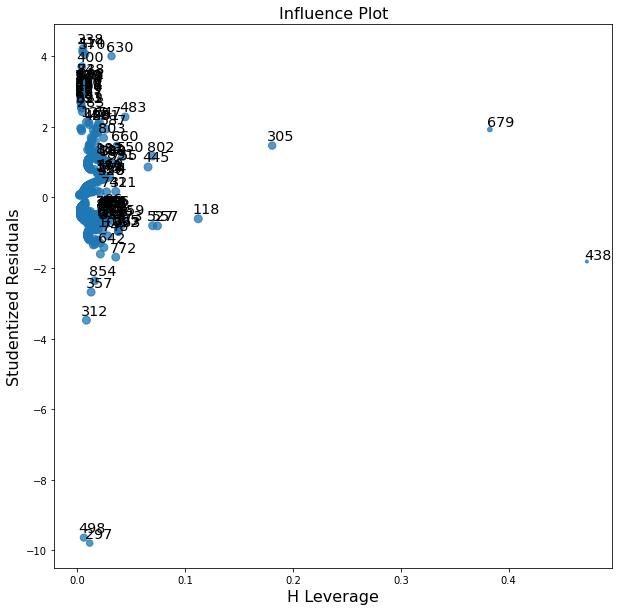

In [17]:
plot_and_describe_model_influence(model_res_C, verbose=False)

In [18]:
# Tree-based models cannot handle categorical variables, therefore we need to one hot encode them

def convert_to_categorical(df, columns):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    df_ = df.copy()
    for col in columns:
        if df_[col].dtype != "object":
            print(f"Skipping column {col} due to dtype")
            continue
            
        item_list = df_[col].unique().tolist()
        enum = enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(col)
        print(d)
        df_[col].replace(d, inplace=True)
        
    return df_

In [19]:
columns = ["Sex", "Embarked"]

X_train = sub_train_df.drop(columns=["Survived", "Name", "Ticket"])
X_train_one_hot_encoded = convert_to_categorical(X_train, columns)
y_train = sub_train_df["Survived"]

X_validation = sub_validation_df.drop(columns=["Survived", "Name", "Ticket"])
X_validation_one_hot_encoded = convert_to_categorical(X_validation, columns)
y_validation = sub_validation_df["Survived"]

Sex
{'male': 0, 'female': 1}
Embarked
{'S': 0, 'C': 1, 'Q': 2}
Sex
{'male': 0, 'female': 1}
Embarked
{'S': 0, 'C': 1, 'Q': 2}


### Optimize threshold using scipy

In [20]:
survive_value = 1
dead_value = 0

# Predict the response for validation dataset
y_pred_probs = model_res_C.predict(X_validation)
print(f"Len of predictins: {len(y_pred_probs)}")
print()

# objective function
def objective(threshold, y_pred_probs, y_validation):
    y_pred = [
        survive_value if p > threshold else dead_value
        for p in y_pred_probs
    ]
    return -1*accuracy_score(y_validation, y_pred)

# define the starting point
starting_pt = 0.5

# perform the l-bfgs-b algorithm search
arguments = (y_pred_probs, y_validation)
result = minimize(fun=objective, x0=starting_pt, method='Nelder-Mead', args=arguments)

# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])

# evaluate solution
optimised_threshold = result['x']
evaluation = objective(optimised_threshold, y_pred_probs, y_validation) * -1
print(f'Accuracy of {evaluation:.4f} with optimised threshold {optimised_threshold[0]}')

Len of predictins: 179

Status : Optimization terminated successfully.
Total Evaluations: 26
Accuracy of 0.7654 with optimised threshold 0.475


In [21]:
# Create a dictionary for accuracy of models
model_accuracy = {}

In [22]:
y_pred = [
    survive_value if p > optimised_threshold else dead_value
    for p in y_pred_probs
]
accuracy = accuracy_score(y_validation, y_pred)
print("GLM Accuracy:", accuracy)
model_accuracy["glm"] = accuracy

GLM Accuracy: 0.7653631284916201


### Task
Compare the results of GLM vs tree-based methods using the validations set to select a final model

### Decision Trees

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
DT_clf = clf.fit(X_train_one_hot_encoded, y_train)

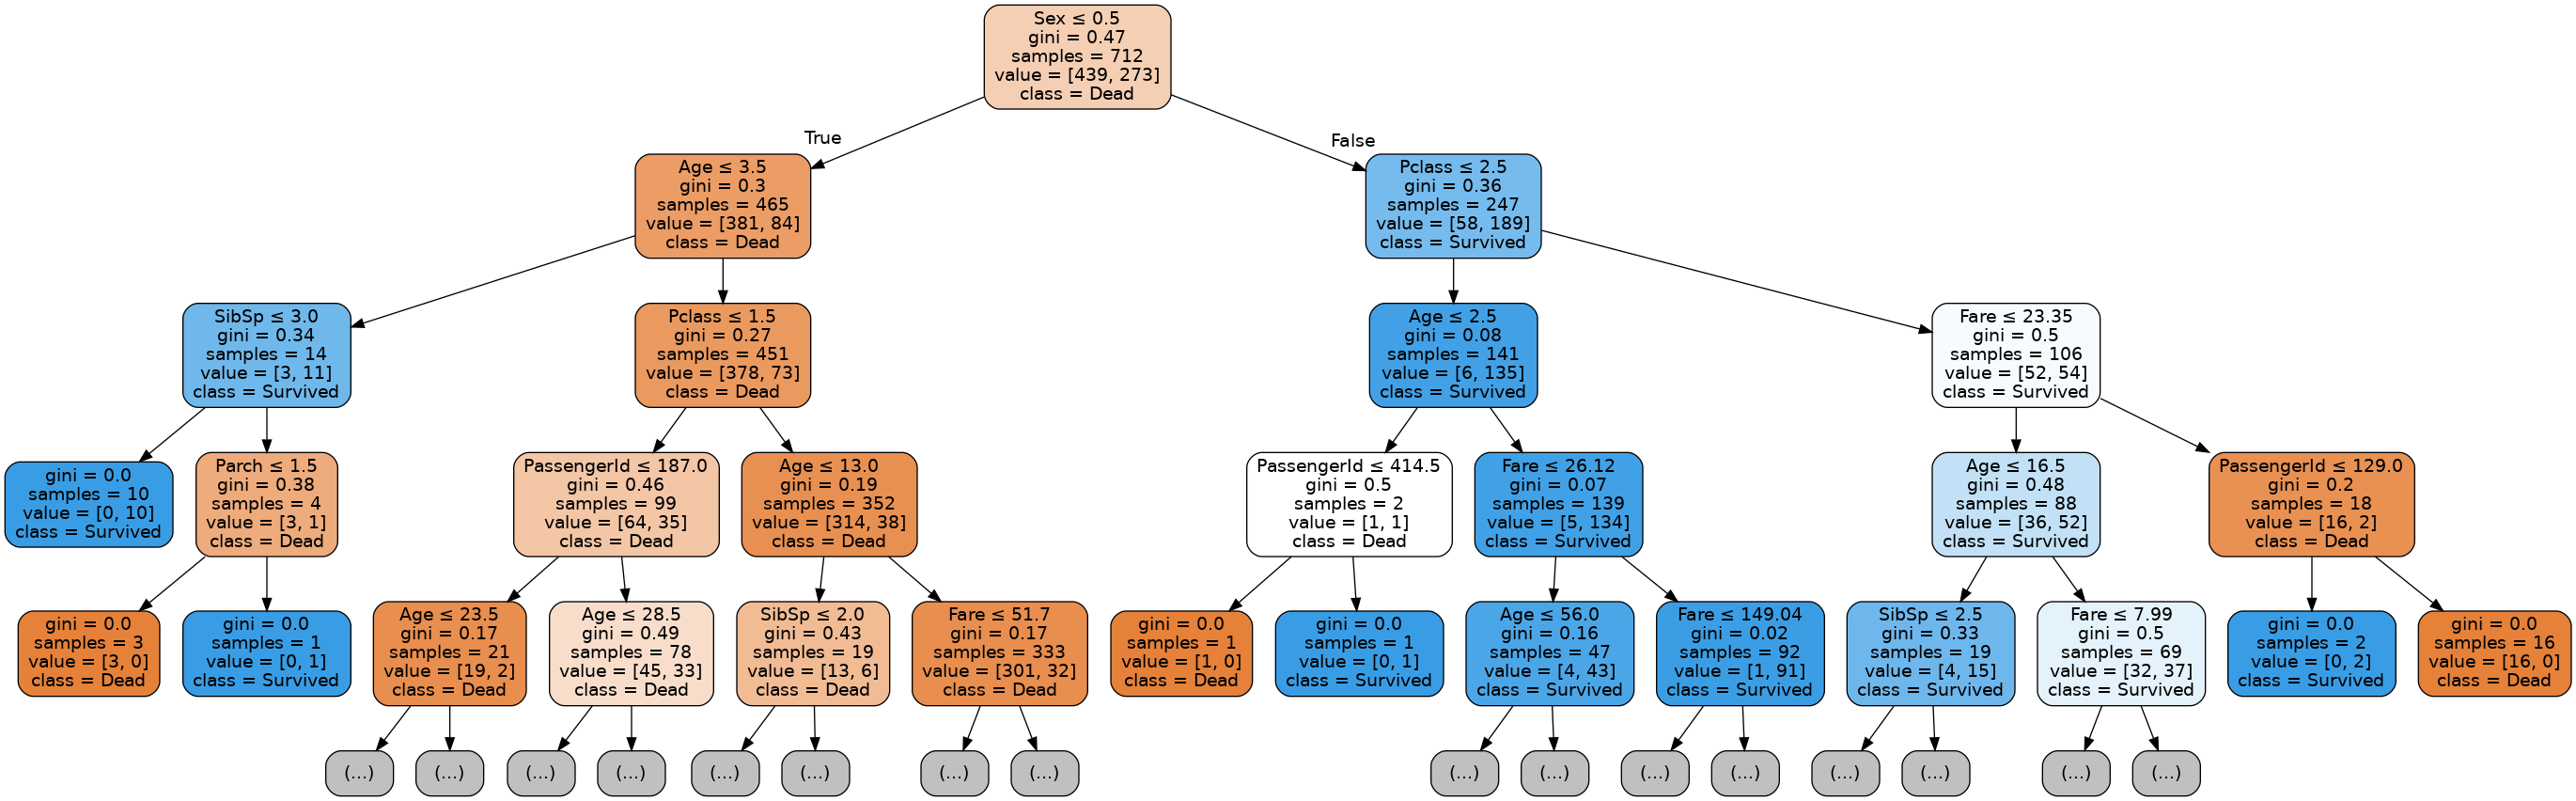

In [24]:
dot_data = StringIO()
export_graphviz(DT_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train_one_hot_encoded.columns,
                class_names=['Dead','Survived'],
                max_depth=4,
                precision=2
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Outputs/titanic.png')
Image(graph.create_png())

In [25]:
# Predict the response for test dataset
y_pred = clf.predict(X_validation_one_hot_encoded)

accuracy = accuracy_score(y_validation, y_pred)
model_accuracy["decision_tree"] = accuracy
print("DT Accuracy:", accuracy_score(y_validation, y_pred))

DT Accuracy: 0.7206703910614525


### Random Forrest

In [26]:
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
random_forrest = rf_clf.fit(X_train_one_hot_encoded, y_train)

# Predict the response for test dataset
y_pred = random_forrest.predict(X_validation_one_hot_encoded)

accuracy = accuracy_score(y_validation, y_pred)
model_accuracy["random_forrest"] = accuracy
print("RF Accuracy:", accuracy)

RF Accuracy: 0.7430167597765364


### AdaBoost

In [27]:
ada_clf = AdaBoostClassifier(random_state=0, learning_rate=0.95)
ada_boost = ada_clf.fit(X_train_one_hot_encoded, y_train)

# Predict the response for test dataset
y_pred = ada_boost.predict(X_validation_one_hot_encoded)

accuracy = accuracy_score(y_validation, y_pred)
model_accuracy["ada_boost"] = accuracy
print("ADA Accuracy:", accuracy)

ADA Accuracy: 0.7877094972067039


### Bagging Classifier

In [28]:
b_clf = BaggingClassifier(random_state=0)
bagging_clf = b_clf.fit(X_train_one_hot_encoded, y_train)

# Predict the response for test dataset
y_pred = bagging_clf.predict(X_validation_one_hot_encoded)

accuracy = accuracy_score(y_validation, y_pred)
model_accuracy["bagging"] = accuracy
print("Bagging Accuracy:", accuracy)

Bagging Accuracy: 0.7932960893854749


### GradientBoostingClassifier

In [29]:
gb_clf = GradientBoostingClassifier(max_depth=2, random_state=0, warm_start=False)
gradient_boost_clf = gb_clf.fit(X_train_one_hot_encoded, y_train)

# Predict the response for test dataset
y_pred = gradient_boost_clf.predict(X_validation_one_hot_encoded)

accuracy = accuracy_score(y_validation, y_pred)
model_accuracy["grad_boost"] = accuracy
print("GB Accuracy:", accuracy)

GB Accuracy: 0.7988826815642458


### HistGradientBoostingClassifier

In [30]:
hgb_clf = HistGradientBoostingClassifier(max_depth=2, random_state=0)
hist_grad_boost_clf = hgb_clf.fit(X_train_one_hot_encoded, y_train)

# Predict the response for test dataset
y_pred = hist_grad_boost_clf.predict(X_validation_one_hot_encoded)

accuracy = accuracy_score(y_validation, y_pred)
model_accuracy["hist_grad_boost"] = accuracy
print("Hist GB Accuracy:", accuracy)

Hist GB Accuracy: 0.7988826815642458


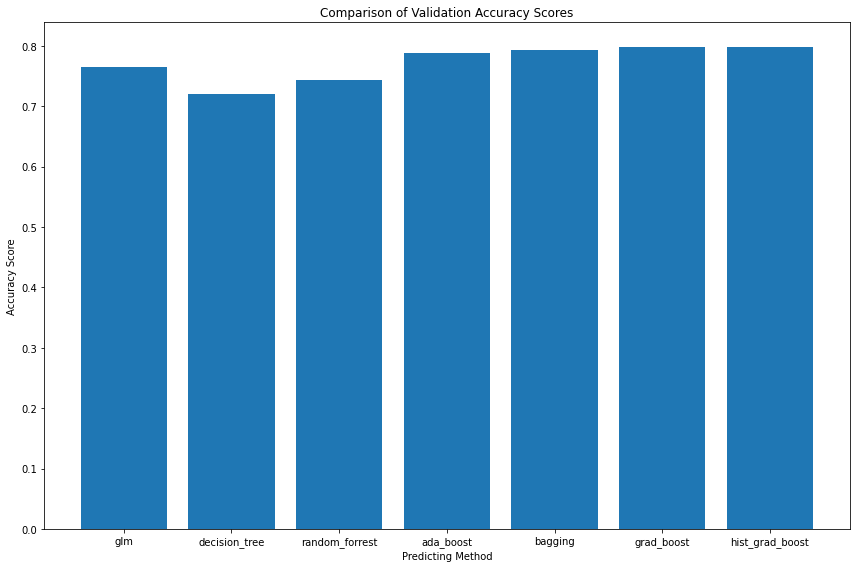

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(*zip(*model_accuracy.items()))
ax.set_title("Comparison of Validation Accuracy Scores")
ax.set_xlabel("Predicting Method")
ax.set_ylabel("Accuracy Score")

plt.tight_layout()
plt.show()

## Prediction Submission

In [32]:
sample_predictions = pd.read_csv("data/example_predictions.csv")
sample_predictions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [33]:
test_path = os.path.join(data_dir, "augmented_test.csv")

test_df = pd.read_csv(test_path)
print(f"Test df: {test_df.shape}\n")
test_df.head()

Test df: (418, 10)



,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S,22.0


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   Age          418 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [35]:
# Predict the response for validation dataset
passenger_ids = test_df["PassengerId"]
y_pred_probs = model_res_C.predict(test_df)
y_pred_probs

print(f"Using optimised threshold of {optimised_threshold}")

survival_predictions = [
    survive_value if p > optimised_threshold else dead_value
    for p in y_pred_probs
]


predictions_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": survival_predictions})
predictions_df.to_csv("data/predictions_26-10-2022.csv", index=False)
predictions_df.head()

Using optimised threshold of [0.475]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Leaderboard Score
| Score | Date | Notes |
| --- | --- | --- |
| 0.760 | 24-10-22 | Base Model
| 0.763 | 25-10-22 | XGBRegressor for Age prediction |